<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Métodos-de-clasificación" data-toc-modified-id="Métodos-de-clasificación-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Métodos de clasificación</a></span></li><li><span><a href="#Obtención-del-margin" data-toc-modified-id="Obtención-del-margin-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Obtención del margin</a></span></li><li><span><a href="#Diferentes-salidas-con-SVM" data-toc-modified-id="Diferentes-salidas-con-SVM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diferentes salidas con SVM</a></span></li><li><span><a href="#Clasificación-para-más-de-una-clase" data-toc-modified-id="Clasificación-para-más-de-una-clase-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clasificación para más de una clase</a></span></li><li><span><a href="#Datos-no-balanceados" data-toc-modified-id="Datos-no-balanceados-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Datos no balanceados</a></span><ul class="toc-item"><li><span><a href="#Ejemplo-de-SVM-no-lineal" data-toc-modified-id="Ejemplo-de-SVM-no-lineal-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Ejemplo de SVM no lineal</a></span></li></ul></li><li><span><a href="#Regresión-con-SVM" data-toc-modified-id="Regresión-con-SVM-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Regresión con SVM</a></span></li><li><span><a href="#Novelty-detection" data-toc-modified-id="Novelty-detection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Novelty detection</a></span></li></ul></div>

# Introducción

Support Vector Machines está constituido por  un conjunto de herramientas de tipo supervised Machine learning usados para clasificación, regresión y detección de Outliers.

En este post no voy a entrar con detalle en la explicación técnica de este procedimiento, pero sí voy a intentar explicar la idea del mismo. Para aclarar ideas supongamos que utilizamos un sistema de clasificación lineal. De lo que se trata es de dividir los grupos mediante un hiperplano se separación. 

![modelo SVM](fig1.PNG)

En la figura anterior, el hiperplano de separación es una línea recta, y paralelo a esa recta existen otras dos que pasan por lo denominados "support vectors". La separación entre un plano paralelo y el hiperplano de separación es lo que se denomina "margin".

Los puntos que están a uno y otro lado de los planos de separación deberán verificar las condiciones que figuran en la siguiente imagen.

![Condiciones a cumplir](fig2.PNG)

A continuación mostramos otra figura que nos servirá de base perfilar un poco más este modelo.

![modelo](fig3.PNG)

En primer lugar y hay que tener en cuenta que el vector independiente (target) va a tomar valores 1 ó -1. Además el hiperplano de separación H se define de tal manera que:

* \\( wx_i+b >=+1 \;cuando\; y_i=+1 \\)
* \\( wx_i+b <=-1 \;cuando\; y_i=-1  \\)

Y además \\( H_1 \\) y \\( H_2 \\) son planos que verifican

* \\( H_1:wx_i+b=+1\\)

* \\( H_2:wx_i+b=-1\\)

d+ y d- tienen el mismo valor y será la distancia de los "support vectors" al hiperplano de separación.


# Métodos de clasificación 

Existen tres métodos  diferentes para trabajar con esta herramienta :
* SVC

* NuSVC

* LinearSVC

Los tres métodos anteriores toman como input dos numpy.arrays, uno de dimensión [n_samples, n_features] ( serían los valores de las X y las columnas serían las features), y el otro de dimensión [n_samples] (serían los valores de la y), también denominado target.

Como en la mayor parte de los métodos utilizados por scikit-learn, la predicción se hace en tres pasos:

* Definición del modelo ( en el ejemplo siguiente se hace con svm.SVC())

* Ajuste del modelo ( en el ejemplo siguiente se hace con clf.fit(X, y) 

* predicción del modelo ( En el siguiente ejemplo se hace con clf.predict )

Veamos a continuación un sencillo ejemplo:

In [1]:
from sklearn import svm
import numpy as np
X = np.array([[1,2],[5,8],[2,3],[8,8],[1,0.6],[9,11],[6,0]])

y=np.array([0,1,0,1,0,1,0])
clf = svm.SVC(kernel='linear', C = 1.0) #Defincición modelo
clf.fit(X, y)  #Ajuste del modelo
print("Predicción del punto [2,2]", clf.predict([[2., 2.]])) #Predicción con el modelo anterior
print("Predicción del punto [7,8]",clf.predict([[7.,8.]]))
print("Los supports vector obtenidos son \n",clf.support_vectors_)

Predicción del punto [2,2] [0]
Predicción del punto [7,8] [1]
Los supports vector obtenidos son 
 [[2. 3.]
 [5. 8.]]


# Obtención del margin

En este apartado vamos a desarrollar algunos aspectos matemáticos que nos servirán para entender el código que se muestra en la celda siguiente.

Una recta de forma analítica queda definida de la siguiente manera:

\\[ r\equiv Ax+By+C=0 \\]

Los términos A, B y C se obtienen después de ajustar el modelo con las expresiones:

* Inde=clf.intercept_ ( término C )

* Param=clf.coef_ ( términos A y B)

Si de la ecuación implícita dada en la anterior forma despejamos el término y, se tendrá la siguiente expresión:

\\[  y= -\frac{C}{B}-\frac{A}{B}x \\]

Es la anterior expresión la que se utiliza para dibujar la recta separadora en el código utilizado en la celda siguiente.

Para calcular el valor del "margín", lo primero que debemos hacer es calcular la distancia que hay desde un "support vector" hasta la línea de separación definida como se ha indicado anteriormente. La fórmula matemática que define esa distancia es la siguiente, si se supone que las coordenadas de un punto del "support vector" es (p,q):

\\[  d=\frac{\|pA+qB+C\|}{\sqrt{A^2+B^2}}  \\]

El valor de d obtenido con la fórmula anterior nos daría la mitad del valor de "margin". Para calcular, los planos paralelos (en este caso rectas) al plano delimitador, lo que hay que hacer es coger dos "support vector" (uno de cada grupo). Como estos vectores vienen en una matriz que en este caso llamamos *clf.support_vectors_*, si elegimos el primer elemento de la matriz y el último aseguramos que elegimos un "support vector" de cada clase. Después lo que hay que hacer es trazar rectas paralelas a la que separa las dos zonas y hacerlas pasar por esos "support vector".

La recta separadora de las dos zonas, ya hemos dicho que es  de la forma.

\\[  r\equiv y=ax+c \\]

Supongamos que el punto ( support vector ) por el que queremos pase tenga coordenadas (p,q), entonces la recta paralela tendrá también pendiente a y por lo tanto su formato será el siguiente: 
\\[ r^{'}\equiv y^{'}=ax+c^{'} \\]

Lo único que queda por calcular es \\( c^{'} \\)), hacemos pasar a la recta paralela por el punto (p,q), y entonces se verificará:

\\[ q=ap+c^{'} \Rightarrow  c^{'}=q-ap \\] 

Y esta expresión será la que se utilice para calcular esas rectas paralelas. 



In [2]:
#Idea tomada de 
#http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
#Idea tomada de 
#http://scikit-learn.org/0.17/auto_examples/svm/plot_separating_hyperplane.html

import math
SuVec=clf.support_vectors_
Inde=clf.intercept_
Param=clf.coef_
C2=-(Inde[0]/Param[0][1])
A2=-(Param[0][0]/Param[0][1])
xx = np.linspace(0,12)
yy=C2+(A2*xx)

A=Param[0][0]
B=Param[0][1]
C=Inde
p=SuVec[0][0]
q=SuVec[0][1]
#Calculamos distancia del punto a la recta separadora
d=(abs(p*A+q*B+C)/math.sqrt((A**2)+(B**2)))
yy2=(C2+d)+(A2*xx)
yy3=(C2-d)+(A2*xx)
#Otra forma de calcular el margin
margin = 1 / np.sqrt(np.sum(Param** 2))
print(d)
print(margin)
# Tomamos un support vector de una región
b=clf.support_vectors_[0]
yy2=A2*xx+(b[1]-A2*b[0])
#Tomamos un support vector de la otra región 
b2=clf.support_vectors_[-1]
yy3=A2*xx+(b2[1]-A2*b2[0])


[2.91547595]
2.91547594742265


In [3]:
import matplotlib.pyplot as plt
plt.plot(xx,yy)
plt.plot(xx,yy2,'k--')
plt.plot(xx,yy3,'k--')
#Sacamos en el gráfico los support vector
plt.scatter(SuVec[:, 0], SuVec[:, 1],s=400, facecolors='none',c='black',linewidths=4,
           alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.show()


<Figure size 640x480 with 1 Axes>

La función de decisión lo que nos va a dar son las distancias de los puntos al hiperplano separador 

In [4]:
clf.decision_function(X)


array([-1.47058824,  1.        , -1.        ,  1.52941176, -1.88235294,
        2.58823529, -1.17647059])

Se puede obtener más información, con los métodos o propiedades que a continuación se exponen:

In [47]:
print("Suport vectors. ", clf.support_vectors_ )
print("Indices de Support vectors: ", clf.support_)
print("Número de suport vectors en cada clase: ", clf.n_support_)
print("Constante en función de decisión: ", clf.intercept_)
print("Distancia de cada elementode X a cada hiperplano: ",clf.decision_function(X) )
print("acuracidad media entre los datos estimados y reales ",clf.score(X,y) )
print("Los parámetros del estimador",clf.get_params() )

Suport vectors.  [[ 0.  0.]
 [ 1.  1.]]
Indices de Support vectors:  [0 1]
Número de suport vectors en cada clase:  [1 1]
Constante en función de decisión:  [-0.]
Distancia de cada elementode X a cada hiperplano:  [-0.63212056  0.63212056]
acuracidad media entre los datos estimados y reales  1.0
Los parámetros del estimador {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': None, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Para mostrar la idea que subyace a esta metodología, a continuación se muestra un ejemplo, en el que se obtiene como resultado los puntos del modelo, así como los hiperplanos de máxima separación entre los dos conjuntos de elementos de la muestra. Como puede verse esto es otra forma de obtener resultados similares a los de los apartados anteriores, pero en esta caso utilizando  clf.decision_function():

Automatically created module for IPython interactive environment
Número de support vector:  [1 2]
support vector:  [[ 7.27059007 -4.84225716]
 [ 5.95313618 -6.82945967]
 [ 7.89359985 -7.41655113]]
{'C': 1000, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
[[-0.2539717  -0.83806387]]
[-3.21132826]


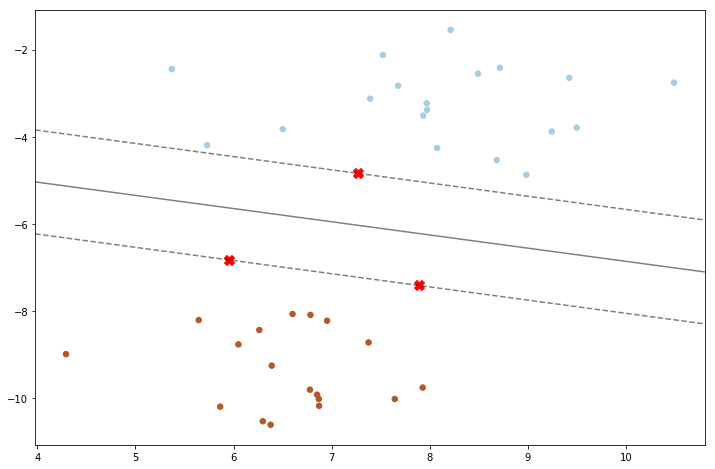

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# Creamos 40 puntos separable, para esto se utiliza la función make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# Ajustamos el modelo
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y) #Aquí hemos obtenido el modelo ajustado
print("Número de support vector: ",clf.n_support_)
print("support vector: ",clf.support_vectors_)
print(clf.get_params())
print(clf.coef_)
print(clf.intercept_)


plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot  decision function
ax = plt.gca()
#Con la instrucción anterior se toman los ejes para poder trabajar con ellos
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# creamos una rejilla para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary y margins
# Ojo aquí uso "ax.contour" entonces saca el contorno. En otros ejemplos pongo "ax.contourf"
#y se dibuja el interior de la zona
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# coloco los support vector 
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none',marker="X",c="red")
plt.show()

Se puede hacer también una clasificación multi clase

# Diferentes salidas con SVM #

Con este ejemplo se pretende mostrar diferentes resultados que se pueden tener con los clasificadores lineales del clasificador SVM (suport vector machine). Para realizar el ejemplo se utiliza el dataset "iris", pero considerando sólo dos features:

* Sepal length
* Sepal width

En este ejemplo vamos a mostrar una serie de plot's en los que se va a ver que se tienen resultados diferentes al utilizar diferentes kernels.

Como se va a poder ver los modelos lineales obtenido tanto con " LinearSVC" como "SVC(kernel='linear') pueden dar diferentes áreas de respuesta. La explicación a esto puede ser por los siguientes motivos:

* LinearSVC minimiza la función "squared hinge loss" minetras que  SVC minimiza la función "regular hinge loss".
* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.


Ambos modelos lineales tienen límites de decisión lineales (hiperplanos que se intersectan), mientras que los modelos de núcleo no lineales (polinomio o RBF gaussiano) tienen límites de decisión no lineales más flexibles con formas que dependen del tipo de núcleo y sus parámetros.

In [19]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

Automatically created module for IPython interactive environment


Creamos una función de utilidad para dibujar la malla que va a servir para después dibujar las regiones.

In [20]:
def make_meshgrid(x, y, h=.02):
    """Para crear una malla de puntos base para dibujar las regiones

    Parametros
    ----------
    x: Datos que sirven de base para obtener las coordenadas x de la malla
    y: Datos que sirven de base para obtener las coordenadas y de la malla
    h: paso entre puntos de la malla, es  optcional

    Returns
    -------
    xx, yy : ndarray conteniendo las coordenadas x e y de la malla.
    """
    x_min, x_max = x.min() - 1, x.max() + 1 #Maximo y mínimo eje x de la malla
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy #Devuelve las coordenadas de la malla

Ahora creamos la función que se encargará de crear los contornos que después serán utilizados para su representación.

In [21]:
def plot_contours(ax, clf, xx, yy, **params):
    """Dibujar las regiones de decisión obtenidas en el SVM.

    Parámetros
    ----------
    ax: Objeto de tipo axes de  matplotlib 
    clf: un clasificador
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: Un diccionario de parámetros que se pasa a la función contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Para cada elemento de la malla obtengo la predicción 
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params) 
    #contourf vrea el contorno. Ver el enlace https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contourf.html
    return out

In [22]:
# importo los datos con los que se va a trabajar
iris = datasets.load_iris()
print(iris.keys()) #Imprimo las claves del diccionario
print(iris.DESCR)  #Imprimo la descripción
# Se selecciona sólo las dos primeras features.
X = iris.data[:, :2]
y = iris.target

# Creamos una instancia de SVM y ajustamos los datos. No escalamos nuestros datos
# Ya que queremos trazar los vectores de soporte.
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC con linear kernel',
          'LinearSVC (linear kernel)',
          'SVC con RBF kernel',
          'SVC con polynomial (degree 3) kernel')


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ==

clase de "fig": <class 'matplotlib.figure.Figure'>


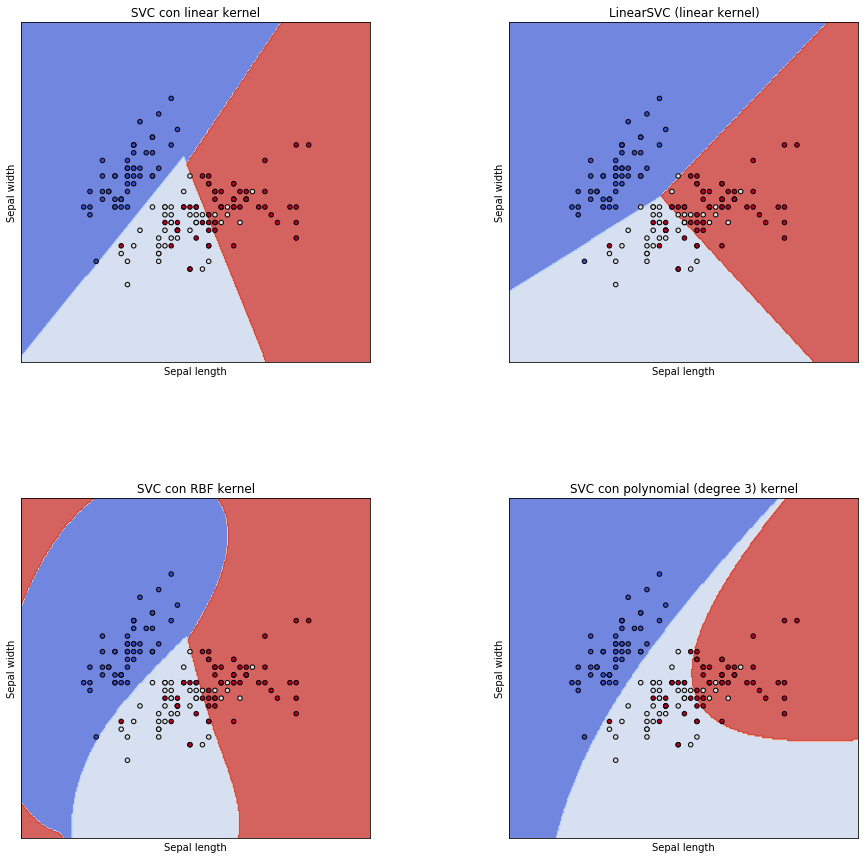

In [23]:
# definimos una red 2x2 para dibujar

fig, sub = plt.subplots(2, 2) #crean subplots de tamaño 2x2 
fig.set_size_inches(15,15)
plt.subplots_adjust(wspace=0.4, hspace=0.4)


X0, X1 = X[:, 0], X[:, 1] #selecciona las dos primeras columnas de los datos
xx, yy = make_meshgrid(X0, X1)

print("clase de \"fig\": %s" % type(fig))

for clf, title, ax in zip(models, titles, sub.flatten()):
    #Como sus es de la clase np.array sub.flatten crea una copia estendida de sub
    #Es similar a ravel tambien de numpy
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


# Clasificación para más de una clase ##

Para este tipo de clasificación los métodos "SVC" y "NuSVC" implementan el sistema "one-against-one" (Knerr et al., 1990). De esta manera si n_class representa el número de clases a obtener, en tonces se construirán un total de $\binom{n\_class}{2}=(n\_class)*(n\_class-1)/2$ clasificadores.
El parámetro "decision_function_shape", permite obtener los resultados de la función de decisión de dos forma distintas:
* Si el valor es 'ovo', se obtiene la función de decisión original que tendrá una dimensión de (n_samples, n_classes * (n_classes - 1) / 2).
* Si el valor es 'ovr' (valor por defecto), devuelve un función de decisión 'one-vs-rest' que tiene una dimensión de (n_samples, n_classes).
Veamos un sencillo ejemplo que aclare estos conceptos.

In [24]:
from sklearn import svm

X = [[0], [1], [2], [3]] #Variable independeiente
Y = [0, 1, 2, 3] #Variable dependiente con cuatro categorías
clf = svm.SVC(decision_function_shape='ovo')  #función decisión one-vs-one 
#shape=n_clases*(n_clases-1)/2
clf.fit(X, Y) 

#Recordar que con decision_funcion se obtiene la distancia de cada punto 
#a los hiperpalnos de separación


dec = clf.decision_function([[1]])
print(dec.shape)
print(dec.shape[1]) # 4 classes: 4*3/2 = 6
print(dec)

clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
print(dec.shape)
print(dec.shape[1]) # 4 classes
print(dec)

print("Clasificación en cada una de las clases:",clf.predict(X))

(1, 6)
6
[[-0.63212056  0.          0.3495638   0.63212056  0.98168436  0.3495638 ]]
(1, 4)
4
[[ 1.9370957   3.5         0.9370957  -0.37419139]]
Clasificación en cada una de las clases: [0 1 2 3]


Sin embargo con el método LinearSVC, se utiliza una estrategia del tipo 'one-vs-the-rest'. Siguiendo con el ejemplo visto anteriormente, a continuación vemos los resultados obtenidos con esta estrategia.

In [25]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y) 

dec = lin_clf.decision_function([[1]])
print(dec.shape)
dec.shape[1]
print('Clasificación en cada una de las clases ',lin_clf.predict(X))

(1, 4)
Clasificación en cada una de las clases  [0 1 3 3]


# Datos no balanceados #

Existen situaciones donde interesa dar diferentes pesos a cada una de las clases o a cada uno de los elementos de la muestra, en estos casos se pueden asignar pesos diferentes mediante las palabras claves ** class_weight ** y ** sample_weight **.

SVC implementa la palabra clave class_weight ( no así NuSVC)en el método 'fit'. Los pesos se indicarán mediante un diccionario que tiene el formato {class_label :value }



SVC, NuSVC, SVR, NuSVR y OneClassSVM implementan también pesos para cada uno de los elementos de la muestra mediante la palabra clave 'sample_weight' del método 'fit'.

A continuación vamos a ver un ejemplo <span style="color:red"> ** donde se asigna diferente pesos a los puntos muestrales (filas de X) **</span>. En la representación  los puntos tienen un radio proporcional al peso de los mismos. 

Con este sistema de pesos, se reescala el parámetro C del modelo, lo que se tarduce en que el clasificador pone más énfasis sobre los puntos asignados correctamente. Como puede verse en este ejemplo, mediante este sistema de pesos, las funciones de decisión cambian considerablemente



Automatically created module for IPython interactive environment
Valores de la X:  [[ 2.76405235  1.40015721]
 [ 1.97873798  3.2408932 ]
 [ 2.86755799  0.02272212]
 [ 1.95008842  0.84864279]
 [ 0.89678115  1.4105985 ]
 [ 1.14404357  2.45427351]
 [ 1.76103773  1.12167502]
 [ 1.44386323  1.33367433]
 [ 2.49407907  0.79484174]
 [ 1.3130677   0.14590426]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]]
Valores de la y  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


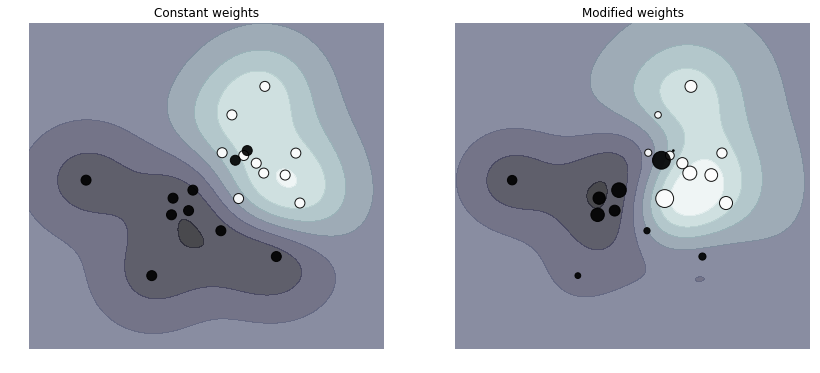

In [26]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#Definimos la función que se encargará de dibujar las funciones de decisión
def plot_decision_function(classifier, sample_weight, axis, title):
    # dibujamos decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    
    #Dibujamos los contronos
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone) 
    # Dibujamos los puntos
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)


# Generamos 20 puntos
np.random.seed(0) #establecemos una semilla fija
#Generamos los valores de la X, una matriz (20,2) obtenida de una distribución normal
#Los 10 primeros son una  N(1,2) y los 10 últimos una N(0,1)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)] 
print("Valores de la X: ", X)
y = [1] * 10 + [-1] * 10 
print("Valores de la y ",y)
#Establecemos los pesos aleatorios (deben ser >0) para cada fila de la X
sample_weight_last_ten = abs(np.random.randn(len(X)))
#Todos los pesos igual a 1
sample_weight_constant = np.ones(len(X))
# y pesos más grandes a algunos valores atípicos.
#a los últimos elementos de la muestra se les asigna un peso elevado
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Para referencia, primer ajuste sin pesos de clase.

# Ajuste del modelo

clf_weights = svm.SVC()
# Al método fit se le asigna el parámetro sample_weight que es el array que contiene 
#los pesos indicados anteriormente e introducidos en la variable sample_weight_last_ten
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC()
#Ajustamos el modelo sin pesos
clf_no_weights.fit(X, y)

# **** para cambiar el tamaño del gráfico se utiliza el parámetro "figsize"
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()

Ahora se va a mostrar otro ejemplo en el que <span style="color:red">** se asigna diferentes pesos a las clases **</span>. Observar que en este caso el peso se asigna con el parámetro 'class_weight' de la función svm.SVC, y según este criterio a la clase identifica con 1 se le asigna un peso de 10.

No handles with labels found to put in legend.


Automatically created module for IPython interactive environment


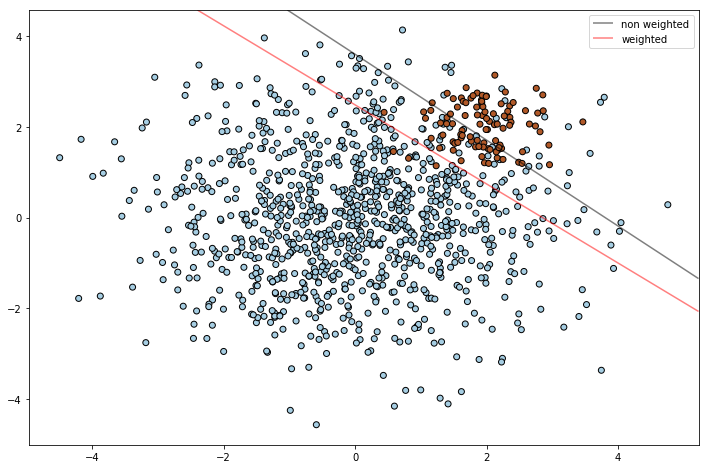

In [27]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# creamos clusters with 1000 and 100 puntos
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100 #Esta es la clase 1 que tiene muchos menos elemento que la clase cero
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# Ajuste del modelo y obtención del hiperplano de separación.
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Ajuste del modelo y obtención plano de separación usando pesos.
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) # Aquí se indica el peso de la clase
wclf.fit(X, y)

# Gráfico hiperplanos separación y muestras
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

# Dibujando función de decisión para ambos clasificadores
ax = plt.gca() #Se obtiene el elemento axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# generamos la red de puntos
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Obtención del hiperplano de sepparación 
Z = clf.decision_function(xy).reshape(XX.shape)

# Dibujo del gráfico de las bandas de decisión y los margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Obención del hiperpalno de separación para clases con pesos
Z = wclf.decision_function(xy).reshape(XX.shape)

# Trazado del límite de decisión y los márgenes para las clases ponderadas.
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

## Ejemplo de SVM no lineal ##

A continuación se muestra un ejemplo de SVM no lineal

Automatically created module for IPython interactive environment


D:\programas\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


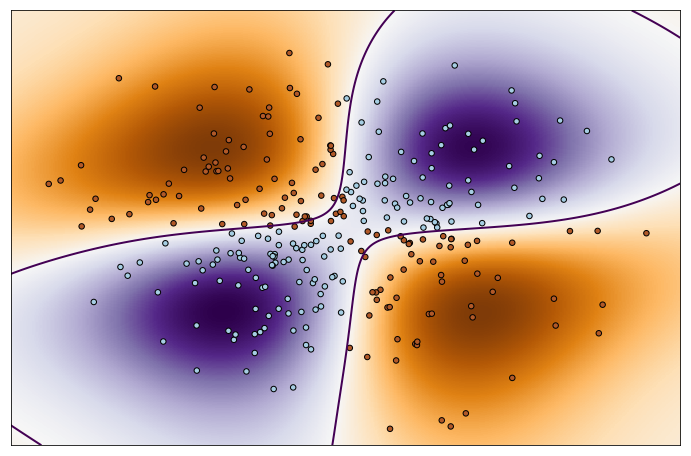

In [28]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Aquí generamos la malla donde se calcula la función de decisión
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0) 
# con el anterior comando se generan T y F dependiendo si el valor es positivo o negativo

# Ajuste del modelo
clf = svm.NuSVC() #Aquí se indica un modelo no lineal
clf.fit(X, Y) #ajuste del modelo

#  Dibujo de la función de decisión para cada punto de la malla.
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,8))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Regresión con SVM #


Los métodos de Support Vector Classification vistos en apartados anteriores pueden ser extendidos y aplicados para resolver problemas de regresión, estos métodos se denominan <span style="color:red">Support Vector Regression </span>. Hay que tener en cuenta, que al igual que en el caso de support vector classification, el modelo obtenido con Support Vector Regression depende sólo de un subconjunto de datos de la muestra.






Existen tres métodos de implementación del modelo Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers linear kernels, while NuSVR implements a slightly different formulation than SVR and LinearSVR. 

Como en los modelos de clasificación, existe una matriz X conteniendo las "features" y otra matriz y, conteniendo las respuestas pero en este caso, el vector y contiene valores reales, no enteros como era en el caso de la clasificación.

A continuación se muestra un ejemplo de este método:

Automatically created module for IPython interactive environment


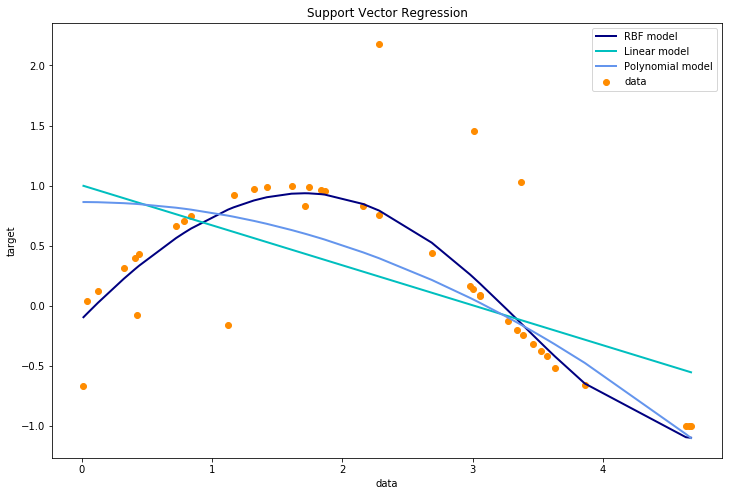

In [29]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generamos los datos
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Añadimos ruido al target
y[::5] += 3 * (0.5 - np.random.rand(8))
plt.figure(figsize=(12,8))
# #############################################################################
# Ajuste del modelo de regresión
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X) # Aquí tendriamos los valores estimados del modelo
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Mostrando los resultados
lw = 2
plt.scatter(X, y, color='darkorange', label='data') #el label sirve para ponerlo después en la leyenda
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Novelty detection #

Por "Novelty detection" se entiende la técnica que consiste en los siguiente: dado un conjunto de datos, ver si otros provienen o no de la misma distribución.

Para más aclaraciones, ver la siguiente dirección web http://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

Automatically created module for IPython interactive environment
Dimensión matriz X: (100, 2)
[[1.63461845 1.90851091]
 [2.30868065 1.9783139 ]
 [1.81980273 2.46567295]
 [2.08607135 1.30382172]]
--------------------------------------------------------------------------------
[[-2.36538155 -2.09148909]
 [-1.69131935 -2.0216861 ]
 [-2.18019727 -1.53432705]
 [-1.91392865 -2.69617828]]
--------------------------------------------------------------------------------
[[1.63461845 1.90851091]
 [2.30868065 1.9783139 ]
 [1.81980273 2.46567295]
 [2.08607135 1.30382172]]
--------------------------------------------------------------------------------
[[-2.36538155 -2.09148909]
 [-1.69131935 -2.0216861 ]
 [-2.18019727 -1.53432705]
 [-1.91392865 -2.69617828]]
(200, 2)


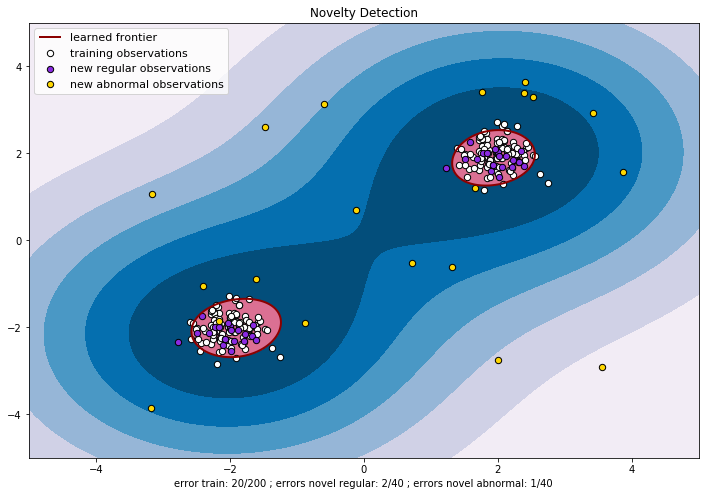

In [30]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

plt.figure(figsize=(12,8))
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
print("Dimensión matriz X:",X.shape)
#X es una matriz de una distribución normal de media 0.3 y varianza 1
X_train = np.r_[X + 2, X - 2]
print((X+2)[0:4,:])
print(80*'-')
print((X-2)[0:4,:])
print(80*'-')
print(X_train[0:4,:])
print(80*'-')
print(X_train[100:104,:])

print(X_train.shape)
#como puede verse por los resultados que se obtienen con las anteriores instrucciones:
# 1.- Se obtiene la matriz X+2 (a cada elemento de X se le suma 2)
# 2.- Se obtiene la matriz X-2
# 3.- Se ponen los elementos de la matriz X+2 y debajo los de la matriz X-2

#Con lo anterior he generado el training, es decir los datos que sirven para hacer el modelo
# A continuación saco los datos del test, es decir los datos para probar si son o no del modelo

# Generamos nuevas observaciones
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
#Los datos anteriores son construidos siguiendo el mismo modelo que los del train, luego deberían
#dar en la prueba que siguen el mismo modelo
# Generamos alguna nueva observación anormal de una distribución U entre -4 y 4
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
#Los datos anteriores deberían dar que siguen modelo diferente

# Ajuste del modelo, ***se utiliza OneClassSVM para problemas de novelty detection
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
#Con lo anterior coloco lo puntos X-train, color=blanco
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
#Con lo anterior coloco los puntos X_test, de color blueviolet
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
#Con lo anterior coloco los puntos outliers de color 'gold'
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()